In [62]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from scipy.stats  import stats 

import matplotlib.pyplot as plt 
import os
import seaborn as sns 

if os.name =='nt' :
    font_family ="Malgun Gothic"
else:
    font_family ="ApplyGothic"
sns.set(font=font_family, rc = {"axes.unicode_minus":False})

In [63]:
from sklearn.datasets import load_iris
iris = load_iris()

In [64]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [65]:
df  = pd.DataFrame(iris.data, columns = iris. feature_names)

df['target']=iris.target

cols = iris.feature_names

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


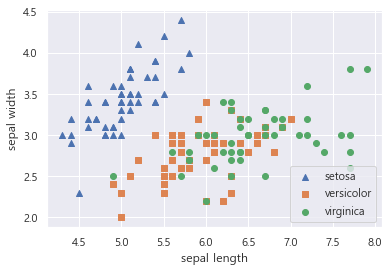

In [66]:
markers=['^','s','o']


for i, marker in enumerate(markers) :
    x_axis_data = df[df['target']== i]['sepal length (cm)']
    y_axis_data = df[df['target']== i]['sepal width (cm)']
    plt.scatter(x_axis_data,y_axis_data, marker=marker,label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler 
iris_scaled= StandardScaler().fit_transform(df.iloc[:,:-1])


In [68]:
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [69]:
pca_columns= ['pca_component_1' ,'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(5)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [70]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
import numpy as np

In [71]:
rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf,iris.data, iris.target,scoring = 'accuracy',cv=3)
print("원본 데이터 교차 검증 정확도:", scores)
print("원본 데이터 교차 검증 평균 정확도:", np.mean(scores))

원본 데이터 교차 검증 정확도: [0.98 0.94 0.96]
원본 데이터 교차 검증 평균 정확도: 0.96


In [72]:
pca_X= irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca= cross_val_score(rcf, pca_X, iris.target, scoring='accuracy',cv=3)
print("원본 데이터 교차 검증 정확도:", scores_pca)
print("원본 데이터 교차 검증 정확도:", np.mean(scores_pca))

원본 데이터 교차 검증 정확도: [0.88 0.88 0.88]
원본 데이터 교차 검증 정확도: 0.88


In [73]:
print(df.columns)
df.head()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
train_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

tsne_np = TSNE(n_components = 2).fit_transform(train_df)

tsne_df = pd.DataFrame(tsne_np,columns = ['component0','component1'])

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [81]:
tsne_df.head()

,component0,component1
0,-7.326659,-22.558767
1,-6.826969,-20.077206
2,-7.566862,-19.877293
3,-7.697001,-19.659109
4,-7.069029,-22.600954


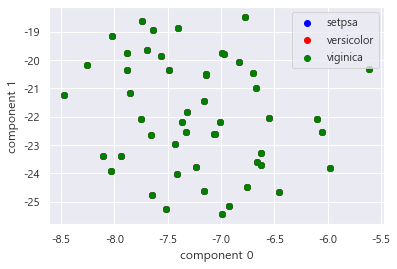

In [87]:
tsne_df['target'] = df['target']

tsne_df_0 = tsne_df[tsne_df['target']== 0]
tsne_df_1 = tsne_df[tsne_df['target']== 1]
tsne_df_2 = tsne_df[tsne_df['target']== 2]


plt.scatter(tsne_df_0['component0'],tsne_df_0['component1'],color = 'blue', label = 'setpsa')
plt.scatter(tsne_df_0['component0'],tsne_df_0['component1'],color = 'red', label = 'versicolor')
plt.scatter(tsne_df_0['component0'],tsne_df_0['component1'],color = 'green', label = 'viginica')


plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()
